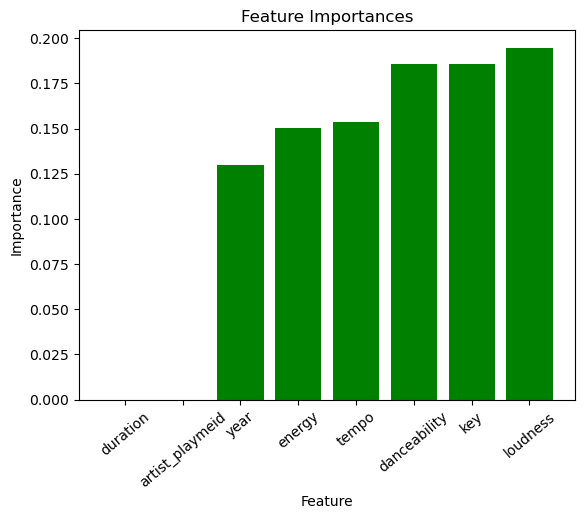

In [4]:
import matplotlib.pyplot as plt

pred_features = ["danceability", "energy", "key", "loudness", "tempo", "year", "duration", "artist_playmeid"]
feature_importance = [0.1858776, 0.15013160, 0.185936351, 0.194742294, 0.15345997, 0.129852082, 0, 0]
data = dict(zip(pred_features, feature_importance))
data = dict(sorted(data.items(), key=lambda item: item[1]))


x_vals = list(range(len(feature_importance)))
plt.bar(x_vals, list(data.values()), orientation = 'vertical', color = "green")
plt.xticks(x_vals, list(data.keys()), rotation=40)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

plt.show()

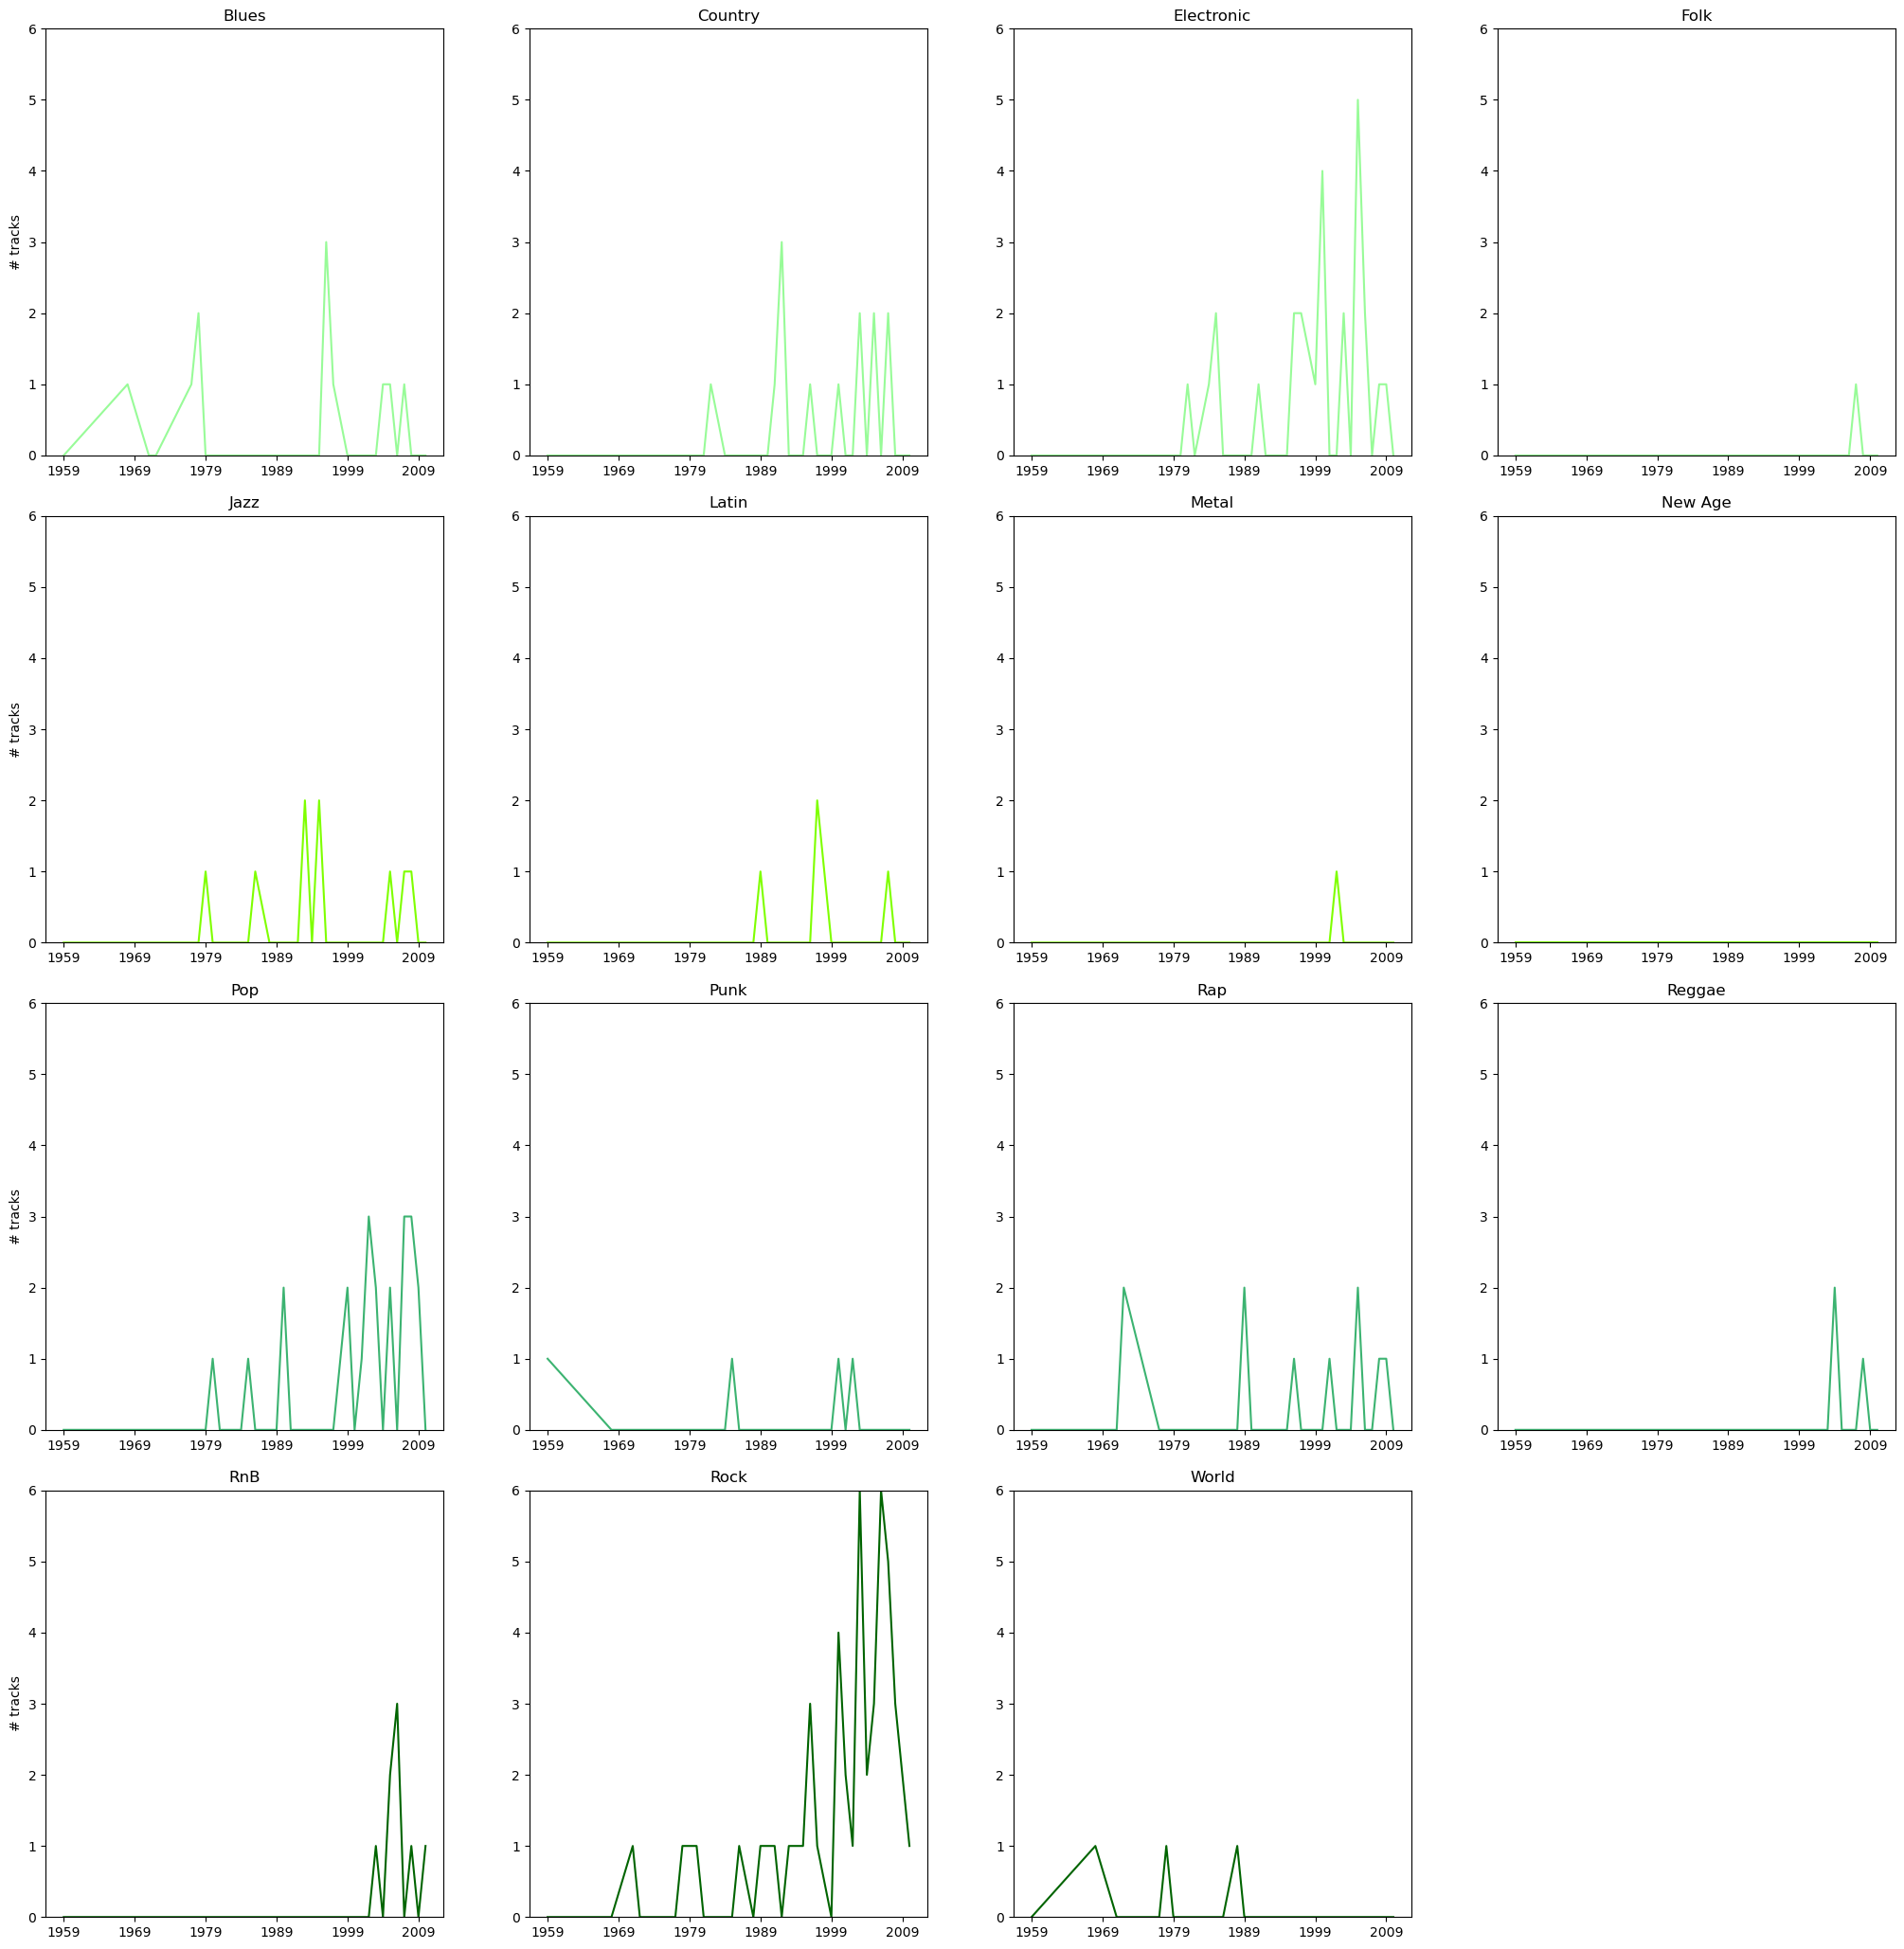

In [70]:
import pandas as pd
import numpy as np

df = pd.read_csv('year_distributions/yearly_data.csv')

years = df["year"].unique()
genres = ["Blues", "Country", "Electronic", "Folk", "Jazz",  "Latin", "Metal", "New Age", "Pop", "Punk", "Rap", "Reggae", "RnB", "Rock", "World"]
# Blues|Country|Electronic|Folk|Jazz|Latin|Metal|New Age|Pop|Punk|Rap|Reggae|RnB|Rock|World


# get rid of the year column and determine the max count
df = df.drop("year", axis=1)
mx_count = df.to_numpy().max() # for rescaling

# set the plots' colours
greens = ['palegreen', 'chartreuse', 'mediumseagreen', 'darkgreen']

# create one subplot for each genre
fig, axs = plt.subplots(4, 4)
axs[-1][-1].axis("off") # remove last subplot

fig.tight_layout(pad=-1.0)
fig.set_figwidth(20)
fig.set_figheight(20)

for i in range(4):
    colour = greens[i]
    for j in range(4):
        if not (i == 3 and j == 3): 
            axs[i][j].plot(years, df[genres[i*4 + j]], color = colour)
            axs[i][j].set_title(genres[i*4 + j]) # the title is the depicted genre
            axs[i][j].set_ybound(lower=0, upper=mx_count) # set the range of track number values

            axs[i][j].xaxis.set_ticks(np.arange(min(years), max(years)+1, 10.0))
            axs[i][j].yaxis.set_ticks(np.arange(0, mx_count+1, 1.0))
            if j == 0:
                axs[i][j].set(ylabel = '# tracks')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

plt.show()